In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

## 1.讀入fashion MNIST

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## 2.查看數據集內容

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Pullover


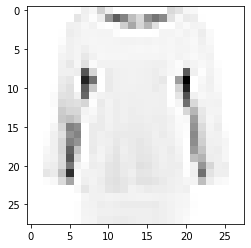

In [6]:
n = 5432
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

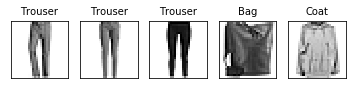

In [7]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys') 

## 3.資料整理

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
x_train = x_train.reshape(60000,784)

In [12]:
x_test = x_test.reshape(10000,784)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train = to_categorical(y_train, 10)

In [15]:
y_test = to_categorical(y_test, 10)

In [16]:
y_train[n]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## 4.建立神經網路模型

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [18]:
model = Sequential()

### 建立第一層 神經元設為50個

In [19]:
model.add(Dense(50, input_dim = 784, activation = 'relu'))

### 建立第二層 神經元設為49個

In [20]:
model.add(Dense(49, activation = 'relu'))

### 建立第三層 神經元設為52個

In [21]:
model.add(Dense(52, activation = 'relu'))

In [22]:
model.add(Dense(10, activation = 'softmax'))

### 把模型的學習率設為0.054

In [23]:
model.compile(loss = 'mse', optimizer = SGD(lr = 0.054), metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 49)                2499      
_________________________________________________________________
dense_2 (Dense)              (None, 52)                2600      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                530       
Total params: 44,879
Trainable params: 44,879
Non-trainable params: 0
_________________________________________________________________


## 5.訓練

### 訓練模型 batch_size設為50 訓練次數設為30次

In [25]:
model.fit(x_train, y_train, batch_size = 50, epochs = 30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0773 - accuracy: 0.3846
Epoch 2/30
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0461 - accuracy: 0.6674
Epoch 3/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0365 - accuracy: 0.7531
Epoch 4/30
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0315 - accuracy: 0.7926
Epoch 5/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0288 - accuracy: 0.8095
Epoch 6/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0270 - accuracy: 0.8196
Epoch 7/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0258 - accuracy: 0.8264
Epoch 8/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0249 - accuracy: 0.8325
Epoch 9/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0242 - accuracy: 0.8372
Epoch 10/30
60

## 準確率有點低，再訓練一次

In [26]:
model.fit(x_train, y_train, batch_size = 50, epochs = 30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0190 - accuracy: 0.8728
Epoch 2/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0188 - accuracy: 0.8741
Epoch 3/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0187 - accuracy: 0.8743
Epoch 4/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0186 - accuracy: 0.8749
Epoch 5/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0185 - accuracy: 0.8764
Epoch 6/30
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0184 - accuracy: 0.8767
Epoch 7/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0183 - accuracy: 0.8776
Epoch 8/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0182 - accuracy: 0.8792
Epoch 9/30
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0181 - accuracy: 0.8795
Epoch 10/30
60

### 試試看能不能讓準確率到0.9

In [27]:
model.fit(x_train, y_train, batch_size = 50, epochs = 30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0161 - accuracy: 0.8929
Epoch 2/30
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0161 - accuracy: 0.8932
Epoch 3/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0160 - accuracy: 0.8933
Epoch 4/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0160 - accuracy: 0.8943
Epoch 5/30
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0159 - accuracy: 0.8941
Epoch 6/30
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0158 - accuracy: 0.8954
Epoch 7/30
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0158 - accuracy: 0.8957
Epoch 8/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0157 - accuracy: 0.8961
Epoch 9/30
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0156 - accuracy: 0.8953
Epoch 10/30
60

## 6.訓練成果

### 查看有沒有overfitting

In [29]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 61us/sample - loss: 0.0188 - accuracy: 0.8729


In [28]:
result = model.predict_classes(x_test)

神經網路預測:  Bag


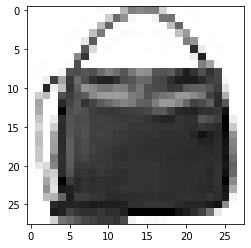

In [30]:
n = 1470
print('神經網路預測: ', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap = 'Greys');